# Using sqlalchemy and pandas to read and write from and to a local sqlite database for NLP

This post includes code adapted from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading) and the [documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_sql.html)

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('nf_complete.csv')

In [20]:
df.columns

Index(['Unnamed: 0', 'year', 'title', 'abstract', 'theme', 'China', 'Russia',
       'War', 'President', 'US', 'Vietnam', 'Cold War', 'World War',
       'Vietnam War', 'Korean War', 'Survey', 'Case Study', 'Trade',
       'Humanitarian', 'fixed_effects', 'instrumental_variable', 'regression',
       'experimental'],
      dtype='object')

In [19]:
df[["year","title"]]

,year,title
0,2000,"""Institutions at the Domestic/International Ne..."
1,2000,Born to Lose and Doomed to Survive: State Deat...
2,2000,The significance of “allegiance” in internatio...
3,2000,The significance of “allegiance” in internatio...
4,2000,Truth-Telling and Mythmaking in Post-Soviet Ru...
...,...,...
121,2018,Planning for the Short Haul: Trade Among Belli...
122,2018,Clinging to the Anti-Imperial Mantle: The Repu...
123,2018,The New Navy's Pacific Wars: Peripheral Confl...
124,2018,"Stop or I'll Shoot, Comply and I Won't: The Di..."


In [21]:
df_subset = df[["year", "title", "abstract", "theme", "War", 'Cold War',"Trade"]]
df_subset

,year,title,abstract,theme,War,Cold War,Trade
0,2000,"""Institutions at the Domestic/International Ne...",Civil-military relations are frequently studie...,IR scholarship,1,0,0
1,2000,Born to Lose and Doomed to Survive: State Deat...,"Under what conditions do states die, or exit t...",IR scholarship,1,1,0
2,2000,The significance of “allegiance” in internatio...,My dissertation employs original and secondary...,IR scholarship,1,0,0
3,2000,The significance of “allegiance” in internatio...,\nThis study revises prevailing interpretation...,Conflit Between States,0,1,0
4,2000,Truth-Telling and Mythmaking in Post-Soviet Ru...,Can distorted and pernicious ideas about histo...,Conflict Between States,1,0,0
...,...,...,...,...,...,...,...
121,2018,Planning for the Short Haul: Trade Among Belli...,"In times of war, why do belligerents continue ...",Conflict between states,1,0,1
122,2018,Clinging to the Anti-Imperial Mantle: The Repu...,"My dissertation project, Clinging to the Anti-...",Cold War,0,1,0
123,2018,The New Navy's Pacific Wars: Peripheral Confl...,Using a transnational methodology and sources ...,Military History,1,0,0
124,2018,"Stop or I'll Shoot, Comply and I Won't: The Di...",There is a dilemma at the heart of coercion. S...,IR Scholarship,0,0,1


In [22]:
df_subset.columns = ["year", "title", "abstract", "theme", "War", 'Cold War',"Trade"]

In [23]:
df_subset

,year,title,abstract,theme,War,Cold War,Trade
0,2000,"""Institutions at the Domestic/International Ne...",Civil-military relations are frequently studie...,IR scholarship,1,0,0
1,2000,Born to Lose and Doomed to Survive: State Deat...,"Under what conditions do states die, or exit t...",IR scholarship,1,1,0
2,2000,The significance of “allegiance” in internatio...,My dissertation employs original and secondary...,IR scholarship,1,0,0
3,2000,The significance of “allegiance” in internatio...,\nThis study revises prevailing interpretation...,Conflit Between States,0,1,0
4,2000,Truth-Telling and Mythmaking in Post-Soviet Ru...,Can distorted and pernicious ideas about histo...,Conflict Between States,1,0,0
...,...,...,...,...,...,...,...
121,2018,Planning for the Short Haul: Trade Among Belli...,"In times of war, why do belligerents continue ...",Conflict between states,1,0,1
122,2018,Clinging to the Anti-Imperial Mantle: The Repu...,"My dissertation project, Clinging to the Anti-...",Cold War,0,1,0
123,2018,The New Navy's Pacific Wars: Peripheral Confl...,Using a transnational methodology and sources ...,Military History,1,0,0
124,2018,"Stop or I'll Shoot, Comply and I Won't: The Di...",There is a dilemma at the heart of coercion. S...,IR Scholarship,0,0,1


In [24]:
import sqlalchemy as db
from sqlalchemy import create_engine
import sqlite3
import pandas as pd

In [10]:
engine = db.create_engine('sqlite:///nf_nlp.db')
connection = engine.connect()
metadata = db.MetaData()

In [11]:
stocks_table = db.Table('stocks_table', metadata, 
    db.Column('Date',db.Integer, nullable=True, index=False),
    db.Column('MSFT_stock',db.Integer, nullable=True),
    db.Column('ZOOM_stock',db.Integer, nullable=True),
    db.Column('SNOW_stock',db.Integer, nullable=True),
    db.Column('FXAIX_stock', db.Numeric, nullable=True)
)

In [12]:
metadata.create_all(engine) #Creates the table

In [13]:
stocks_table

Table('stocks_table', MetaData(bind=None), Column('Date', Integer(), table=<stocks_table>), Column('MSFT_stock', Integer(), table=<stocks_table>), Column('ZOOM_stock', Integer(), table=<stocks_table>), Column('SNOW_stock', Integer(), table=<stocks_table>), Column('FXAIX_stock', Numeric(), table=<stocks_table>), schema=None)

In [14]:
stocks.to_sql('stocks_table', con=engine, if_exists='append', index=False)

In [15]:
engine.execute("SELECT * FROM stocks_table LIMIT 10").fetchall()

[('2020-01-02 00:00:00.000000', 158.77999877929688, 68.80000305175781, None, 112.9800033569336),
 ('2020-01-03 00:00:00.000000', 158.32000732421875, 67.62000274658203, None, 112.19000244140625),
 ('2020-01-06 00:00:00.000000', 157.0800018310547, 66.62999725341797, None, 112.58999633789062),
 ('2020-01-07 00:00:00.000000', 159.32000732421875, 70.29000091552734, None, 112.29000091552734),
 ('2020-01-08 00:00:00.000000', 158.92999267578125, 71.80999755859375, None, 112.83999633789062),
 ('2020-01-09 00:00:00.000000', 161.83999633789062, 73.98999786376953, None, 113.62000274658203),
 ('2020-01-10 00:00:00.000000', 162.82000732421875, 73.08000183105469, None, 113.30000305175781),
 ('2020-01-13 00:00:00.000000', 161.75999450683594, 73.88999938964844, None, 114.08999633789062),
 ('2020-01-14 00:00:00.000000', 163.38999938964844, 74.31999969482422, None, 113.93000030517578),
 ('2020-01-15 00:00:00.000000', 162.6199951171875, 73.27999877929688, None, 114.13999938964844)]

In [68]:
sql = """
SELECT
  DATE(date) AS DATE
, FXAIX_stock
, MSFT_stock
, SNOW_stock
, row_number() OVER (PARTITION BY Date, MSFT_stock ORDER BY Date) AS REC_NBR
, COUNT(*) OVER (PARTITION BY Date, MSFT_stock ORDER BY Date) AS REC_CNT
, CASE WHEN FXAIX_stock >= 120 THEN 'SNP_High' ELSE 'SNP_low' END AS SNP_HIGH_LOW
FROM stocks_table
--WHERE FXAIX_stock >= 120
"""

cnxn = connection

In [69]:
stocks = pd.read_sql(sql, cnxn)

In [71]:
stocks.tail(30)

,DATE,FXAIX_stock,MSFT_stock,SNOW_stock,REC_NBR,REC_CNT,SNP_HIGH_LOW
162,2020-08-24,119.260002,214.789993,NaN,1,1,SNP_low
163,2020-08-25,119.690002,213.100006,NaN,1,1,SNP_low
164,2020-08-26,120.910004,217.880005,NaN,1,1,SNP_High
165,2020-08-27,121.120003,222.889999,NaN,1,1,SNP_High
166,2020-08-28,121.940002,228.179993,NaN,1,1,SNP_High
167,2020-08-31,121.690002,227.000000,NaN,1,1,SNP_High
168,2020-09-01,122.610001,225.509995,NaN,1,1,SNP_High
169,2020-09-02,124.510002,227.970001,NaN,1,1,SNP_High
170,2020-09-03,120.150002,229.270004,NaN,1,1,SNP_High
171,2020-09-04,119.180000,215.100006,NaN,1,1,SNP_low


Text(0.5, 1.0, 'Total S&P 500 in 2020 Value')

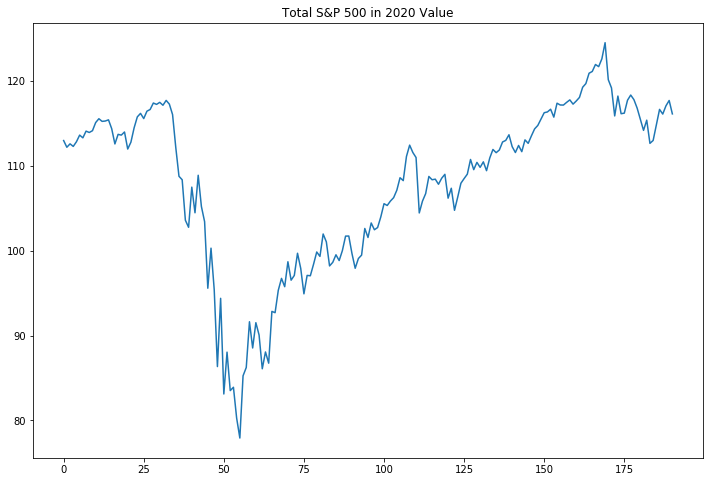

In [72]:
stocks['FXAIX_stock'].plot(figsize = (12, 8))
plt.title('Total S&P 500 in 2020 Value')